In [7]:
import seaborn as sns
import pandas as pd

rtimes=pd.read_csv('results_bridges.tsv', sep='\t', header=0)
rtimes["Group"] = rtimes["Data"] +"-"+ rtimes["Environment"]
rtimes['Tool'] = rtimes['Tool'].astype('category')
rtimes['Data'] = rtimes['Data'].astype('category')
rtimes['Environment'] = rtimes['Environment'].astype('category')
rtimes['Group'] = rtimes['Group'].astype('category')
rtimes

,Tool,Data,Environment,Walltime(sec.),Usertime(sec.),Group
0,orfipy_bed,Bac (1.5 GB),PC,51.88,188.30,Bac (1.5 GB)-PC
1,orfipy_fa,Bac (1.5 GB),PC,135.20,624.40,Bac (1.5 GB)-PC
2,orfm_fa,Bac (1.5 GB),PC,148.36,40.46,Bac (1.5 GB)-PC
3,orfm_pep,Bac (1.5 GB),PC,54.04,22.98,Bac (1.5 GB)-PC
4,getorf_fa,Bac (1.5 GB),PC,248.70,233.09,Bac (1.5 GB)-PC
5,orfipy_bed,A. thal (120 MB),PC,12.84,9.78,A. thal (120 MB)-PC
6,orfipy_fa,A. thal (120 MB),PC,14.73,12.94,A. thal (120 MB)-PC
7,orfm_fa,A. thal (120 MB),PC,1.45,1.35,A. thal (120 MB)-PC
8,orfm_pep,A. thal (120 MB),PC,1.31,1.25,A. thal (120 MB)-PC
9,getorf_fa,A. thal (120 MB),PC,12.66,12.13,A. thal (120 MB)-PC


/home/usingh/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/home/usingh/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


Text(0.5, 0, '')

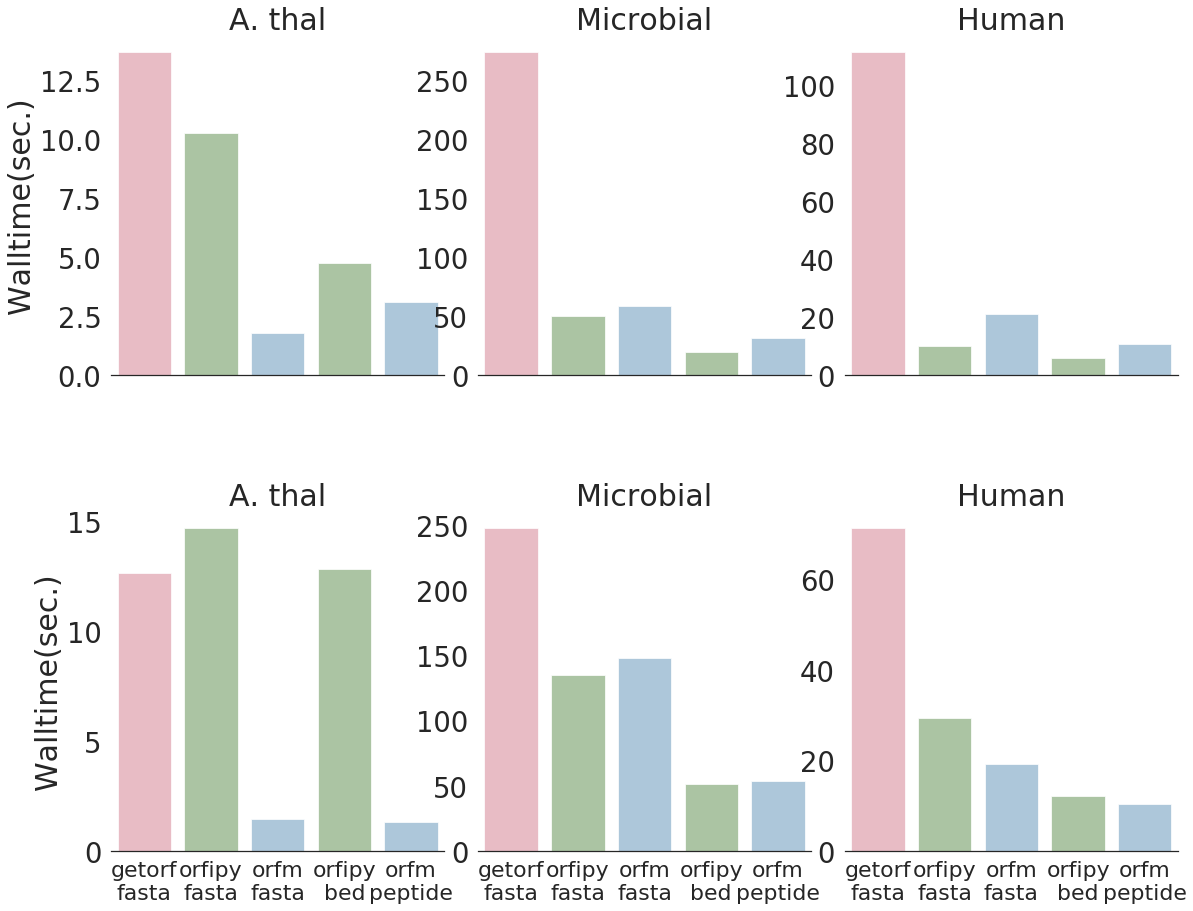

In [8]:
sns.set(font_scale=2.5,style="white")
colors = ["#ea95a7", "#84b375","#84b375","#80b2d6","#80b2d6"]# Set your custom color palette
#sns.set_palette(sns.color_palette(colors))

g = sns.FacetGrid(rtimes, row="Environment",col="Data", hue="Tool",
                  palette=sns.color_palette(colors,desat=1),
                  sharey=False,sharex=True,legend_out=True,height=7.5, 
                  aspect=.85,gridspec_kws={"wspace":0.1,"hspace":0.4})
xorder=['getorf_fa','orfipy_fa','orfm_fa','orfipy_bed','orfm_pep']
g.map(sns.barplot, "Tool", "Walltime(sec.)", alpha=.7,ci=None,order=xorder)
g.despine(left=True)
#g.add_legend()
#plt.legend(loc='upper left')


g.set_xticklabels(['getorf\nfasta','orfipy\nfasta','orfm\nfasta','orfipy\nbed','orfm\npeptide'],rotation=0,size=22)
axes = g.axes.flatten()
axes[0].set_title("A. thal")
axes[1].set_title("Microbial")
axes[2].set_title("Human")
axes[3].set_title("A. thal")
axes[4].set_title("Microbial")
axes[5].set_title("Human")
for ax in axes:
    ax.set_xlabel("")
axes[4].set_xlabel("")



Text(0.5, 0, '')

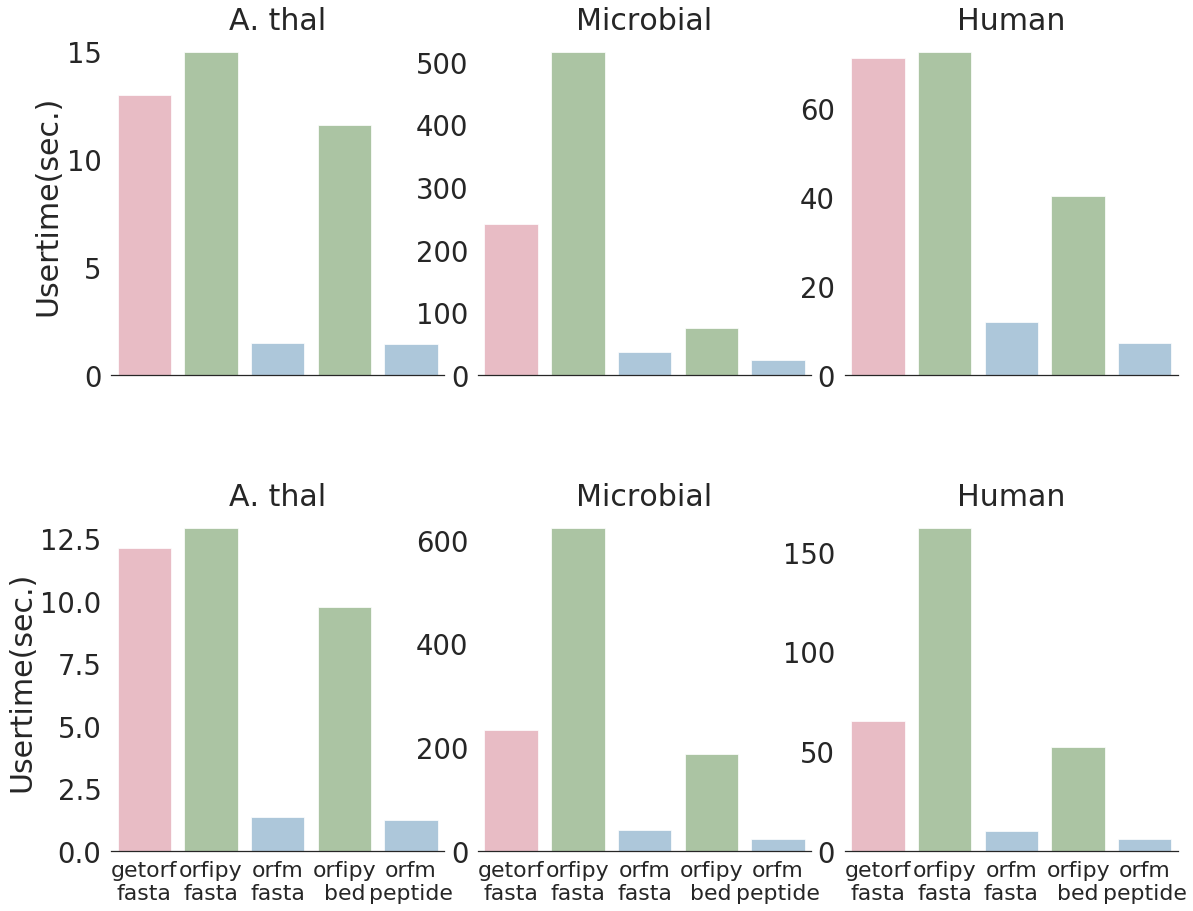

In [9]:
sns.set(font_scale=2.5,style="white")
colors = ["#ea95a7", "#84b375","#84b375","#80b2d6","#80b2d6"]# Set your custom color palette
#sns.set_palette(sns.color_palette(colors))

g = sns.FacetGrid(rtimes, row="Environment",col="Data", hue="Tool",
                  palette=sns.color_palette(colors,desat=1),
                  sharey=False,sharex=True,legend_out=True,height=7.5, 
                  aspect=.85,gridspec_kws={"wspace":0.1,"hspace":0.4})
xorder=['getorf_fa','orfipy_fa','orfm_fa','orfipy_bed','orfm_pep']
g.map(sns.barplot, "Tool", "Usertime(sec.)", alpha=.7,ci=None,order=xorder)
g.despine(left=True)
#g.add_legend()
#plt.legend(loc='upper left')


g.set_xticklabels(['getorf\nfasta','orfipy\nfasta','orfm\nfasta','orfipy\nbed','orfm\npeptide'],rotation=0,size=22)
axes = g.axes.flatten()
axes[0].set_title("A. thal")
axes[1].set_title("Microbial")
axes[2].set_title("Human")
axes[3].set_title("A. thal")
axes[4].set_title("Microbial")
axes[5].set_title("Human")
for ax in axes:
    ax.set_xlabel("")
axes[4].set_xlabel("")

/home/usingh/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


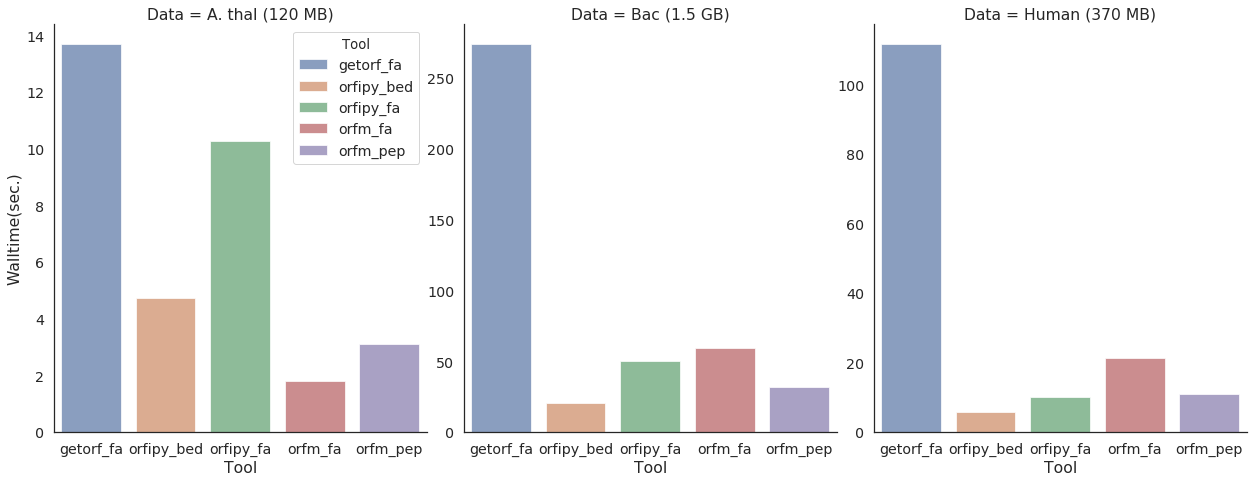

In [5]:
#create subset
#data_HPC=df.loc[df['column_name'] == some_value]
rtimes_hpc=rtimes[rtimes['Environment'] == 'HPC']
rtimes_hpc
colors = ["#ffdba9" ,"#ff95ca","#99d5ca"]
sns.set_palette(colors)

sns.set(font_scale=1.3,style="white")
g2 = sns.FacetGrid(rtimes_hpc, col="Data", hue="Tool",
                  sharey=False,legend_out=False,height=7.5, 
                  aspect=.95,gridspec_kws={"wspace":0.1,"hspace":0.1})
g2.map(sns.barplot, "Tool", "Walltime(sec.)", alpha=.7,ci=None)
g2.add_legend()